<a href="https://colab.research.google.com/github/Xander2580/SecondRepo/blob/main/finalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files, drive
import numpy as np, pandas as pd, tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk, re, string, time, zipfile, os
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

print("📁 Upload best_bilstm_model.keras:")
uploaded = files.upload()

drive.mount('/content/drive')

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Load dataset (ONLY for creating tokenizer - NOT training!)
zip_path = '/content/drive/MyDrive/ColabNotebooks/kaggle.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')
df = pd.read_csv('/content/dataset/fake reviews dataset.csv')

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text): return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text_'].apply(preprocess_text)

# Create tokenizer (recreate same one used during training)
MAX_WORDS, MAX_LEN = 10000, 200
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'].values)

# Load SAVED model (NO TRAINING!)
best_model = keras.models.load_model('best_bilstm_model.keras')

print("\n✅ Setup complete! Model loaded (NO training needed)")
print(f"✓ Model parameters: {best_model.count_params():,}")


📁 Upload best_bilstm_model.keras:


Saving best_bilstm_model.keras to best_bilstm_model (1).keras
Mounted at /content/drive

✅ Setup complete! Model loaded (NO training needed)
✓ Model parameters: 1,089,281


In [ ]:
!pip install gradio -q
import gradio as gr

def predict(text, thresh=0.5):
    if not text: return ("⚠️ Enter review", "N/A", "N/A", "", "")
    p = preprocess_text(text)
    if not p: return ("⚠️ Invalid", "N/A", "N/A", "", "")
    s = tokenizer.texts_to_sequences([p])
    pad = pad_sequences(s, maxlen=MAX_LEN, padding='post')
    prob = best_model.predict(pad, verbose=0)[0][0]
    pred = "GENUINE" if prob > thresh else "FAKE"
    conf = prob if prob > thresh else 1 - prob
    bar = "█" * int(conf * 20) + "░" * (20 - int(conf * 20))
    return (f"{'✅' if pred=='GENUINE' else '🚨'} **{pred}**",
            f"{conf*100:.2f}%", f"{prob:.4f}",
            f"## {pred}\n### Confidence: {conf*100:.2f}%\n`{bar}`",
            f"Words: {len(text.split())}")


with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.HTML("<h1 style='text-align:center'>Fake Review Detection System</h1>")


    with gr.Row():
        with gr.Column(scale=2):
            inp = gr.Textbox(label="Review", lines=6)
            th = gr.Slider(0.3, 0.7, 0.5, 0.05, label="⚙️ Threshold")
            btn = gr.Button("Analyze", variant="primary", size="lg")
        with gr.Column():
            gr.Markdown("Examples")
            gr.Button("Incentivized").click(lambda: "I received this at discount for review. Excellent!", outputs=inp)
            gr.Button("Generic").click(lambda: "Amazing! Best!", outputs=inp)
            gr.Button("Detailed").click(lambda: "Battery disappointing. Only 4 hours.", outputs=inp)


    res = gr.Markdown()
    with gr.Row():
        conf = gr.Textbox(label="Confidence")
        prob = gr.Textbox(label="Probability")
    det = gr.Markdown()
    with gr.Accordion("Details", open=False):
        ana = gr.Markdown()


    btn.click(predict, [inp, th], [res, conf, prob, det, ana])


demo.launch(share=True)


/tmp/ipython-input-2646888582.py:20: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://263fb066c870301ca6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


TRAINING BASELINE MACHINE LEARNING MODELS
Original unique labels: ['CG' 'OR']
Encoded unique labels: [0 1]

Dataset Split:
Training: 32,345 reviews
Validation: 4,043 reviews
Test: 4,044 reviews

TF-IDF VECTORIZATION
Transforming text to TF-IDF features...
✓ TF-IDF matrix shape: (32345, 10000)
  Vocabulary size: 10,000

TRAINING BASELINE MODELS

1. Training Naive Bayes...
   Accuracy: 86.99%
   Training time: 0.01s

2. Training Logistic Regression...
   Accuracy: 89.02%
   Training time: 0.25s

3. Training Decision Tree...
   Accuracy: 68.99%
   Training time: 9.23s

4. Training Random Forest...
   Accuracy: 85.51%
   Training time: 93.78s

5. Training SVM...
   Accuracy: 89.86%
   Training time: 339.32s

DETAILED BASELINE MODEL RESULTS

NAIVE BAYES

Performance Metrics:
  Accuracy:  86.99%
  Precision: 85.62%
  Recall:    88.92%
  F1-Score:  87.24%
  Training Time: 0.01s

Classification Report:
              precision    recall  f1-score   support

   Fake (CG)     0.8848    0.8506    

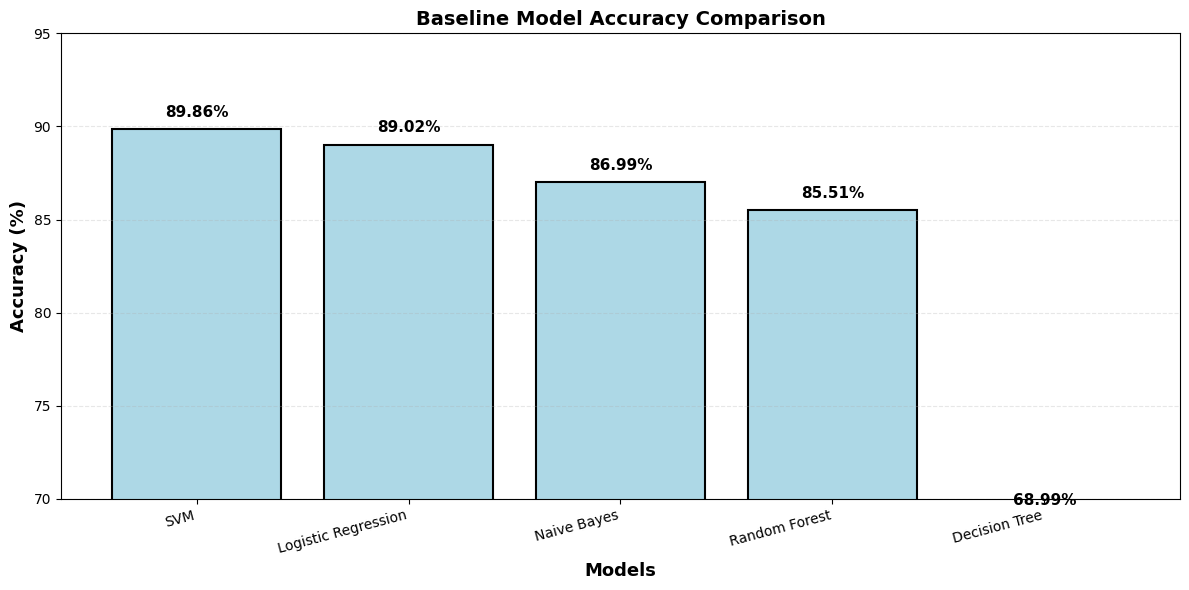

✓ Baseline model comparison chart saved!

✓ Best Baseline Model: SVM
  Accuracy: 89.86%
✓ Best baseline model saved as 'best_baseline_model.pkl'
✓ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'


In [ ]:
# ============================================================================
# BASELINE MODELS: TRADITIONAL MACHINE LEARNING
# ============================================================================

import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("="*70)
print("TRAINING BASELINE MACHINE LEARNING MODELS")
print("="*70)

# Encode the 'label' column
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print(f"Original unique labels: {le.classes_}")
print(f"Encoded unique labels: {np.unique(df['label_encoded'])}")

# Use the preprocessed text data
X = df['cleaned_text'].values
y = df['label_encoded'].values

# Split data (same as for BiLSTM)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1111, random_state=42, stratify=y_temp
)

print(f"\nDataset Split:")
print(f"Training: {len(X_train):,} reviews")
print(f"Validation: {len(X_val):,} reviews")
print(f"Test: {len(X_test):,} reviews")

# ============================================================================
# TF-IDF VECTORIZATION
# ============================================================================

print("\n" + "="*70)
print("TF-IDF VECTORIZATION")
print("="*70)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),  # Unigrams and bigrams
    min_df=2,
    max_df=0.95
)

# Fit on training data and transform
print("Transforming text to TF-IDF features...")
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

print(f"✓ TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"  Vocabulary size: {len(tfidf.vocabulary_):,}")

# ============================================================================
# TRAIN BASELINE MODELS
# ============================================================================

print("\n" + "="*70)
print("TRAINING BASELINE MODELS")
print("="*70)

# Dictionary to store results
baseline_results = {}

# 1. NAIVE BAYES
print("\n1. Training Naive Bayes...")
start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_time = time.time() - start_time

baseline_results['Naive Bayes'] = {
    'model': nb_model,
    'accuracy': nb_accuracy,
    'predictions': nb_pred,
    'time': nb_time
}
print(f"   Accuracy: {nb_accuracy*100:.2f}%")
print(f"   Training time: {nb_time:.2f}s")

# 2. LOGISTIC REGRESSION
print("\n2. Training Logistic Regression...")
start_time = time.time()
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_time = time.time() - start_time

baseline_results['Logistic Regression'] = {
    'model': lr_model,
    'accuracy': lr_accuracy,
    'predictions': lr_pred,
    'time': lr_time
}
print(f"   Accuracy: {lr_accuracy*100:.2f}%")
print(f"   Training time: {lr_time:.2f}s")

# 3. DECISION TREE
print("\n3. Training Decision Tree...")
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42, max_depth=20)
dt_model.fit(X_train_tfidf, y_train)
dt_pred = dt_model.predict(X_test_tfidf)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_time = time.time() - start_time

baseline_results['Decision Tree'] = {
    'model': dt_model,
    'accuracy': dt_accuracy,
    'predictions': dt_pred,
    'time': dt_time
}
print(f"   Accuracy: {dt_accuracy*100:.2f}%")
print(f"   Training time: {dt_time:.2f}s")

# 4. RANDOM FOREST
print("\n4. Training Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_time = time.time() - start_time

baseline_results['Random Forest'] = {
    'model': rf_model,
    'accuracy': rf_accuracy,
    'predictions': rf_pred,
    'time': rf_time
}
print(f"   Accuracy: {rf_accuracy*100:.2f}%")
print(f"   Training time: {rf_time:.2f}s")

# 5. SUPPORT VECTOR MACHINE (SVM)
print("\n5. Training SVM...")
start_time = time.time()
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_time = time.time() - start_time

baseline_results['SVM'] = {
    'model': svm_model,
    'accuracy': svm_accuracy,
    'predictions': svm_pred,
    'time': svm_time
}
print(f"   Accuracy: {svm_accuracy*100:.2f}%")
print(f"   Training time: {svm_time:.2f}s")

# ============================================================================
# DETAILED RESULTS FOR EACH MODEL
# ============================================================================

print("\n" + "="*70)
print("DETAILED BASELINE MODEL RESULTS")
print("="*70)

# Define target names based on LabelEncoder's mapping (CG:0, OR:1)
target_names = [f'Fake ({le.inverse_transform([0])[0]})', f'Genuine ({le.inverse_transform([1])[0]})']

for model_name, results in baseline_results.items():
    print(f"\n{'='*70}")
    print(f"{model_name.upper()}")
    print(f"{'='*70}")

    y_pred = results['predictions']

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\nPerformance Metrics:")
    print(f"  Accuracy:  {accuracy*100:.2f}%")
    print(f"  Precision: {precision*100:.2f}%")
    print(f"  Recall:    {recall*100:.2f}%")
    print(f"  F1-Score:  {f1*100:.2f}%")
    print(f"  Training Time: {results['time']:.2f}s")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred,
                                target_names=target_names,
                                digits=4))

    print(f"\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

# ============================================================================
# COMPARISON SUMMARY
# ============================================================================

print("\n" + "="*70)
print("BASELINE MODELS COMPARISON SUMMARY")
print("="*70)

# Create comparison dataframe
comparison_data = []
for model_name, results in baseline_results.items():
    y_pred = results['predictions']
    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred) * 100,
        'Precision': precision_score(y_test, y_pred) * 100,
        'Recall': recall_score(y_test, y_pred) * 100,
        'F1-Score': f1_score(y_test, y_pred) * 100,
        'Training Time (s)': results['time']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print("\n")
print(comparison_df.to_string(index=False))

# ============================================================================
# VISUALIZATION: COMPARISON CHART
# ============================================================================

print("\n" + "="*70)
print("GENERATING COMPARISON VISUALIZATIONS")
print("="*70)

# Accuracy comparison bar chart
fig, ax = plt.subplots(figsize=(12, 6))
models = comparison_df['Model'].values
accuracies = comparison_df['Accuracy'].values

colors = ['lightblue'] * len(models)
bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.2f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Models', fontsize=13, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Baseline Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(70, 95)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig('baseline_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Baseline model comparison chart saved!")

# ============================================================================
# SAVE BEST BASELINE MODEL
# ============================================================================

best_baseline = comparison_df.iloc[0]
print(f"\n✓ Best Baseline Model: {best_baseline['Model']}")
print(f"  Accuracy: {best_baseline['Accuracy']:.2f}%")

# Save the best model
import pickle
best_model_name = best_baseline['Model']
best_model = baseline_results[best_model_name]['model']

with open('best_baseline_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("✓ Best baseline model saved as 'best_baseline_model.pkl'")
print("✓ TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")

BASELINE MODELS vs BiLSTM COMPARISON

Model Accuracies:
--------------------------------------------------
SVM                      : 89.86%
Logistic Regression      : 89.02%
Naive Bayes              : 86.99%
Random Forest            : 85.51%
Decision Tree            : 68.99%
BiLSTM (Proposed)        : 91.73% ✓

Generating comparison visualizations...


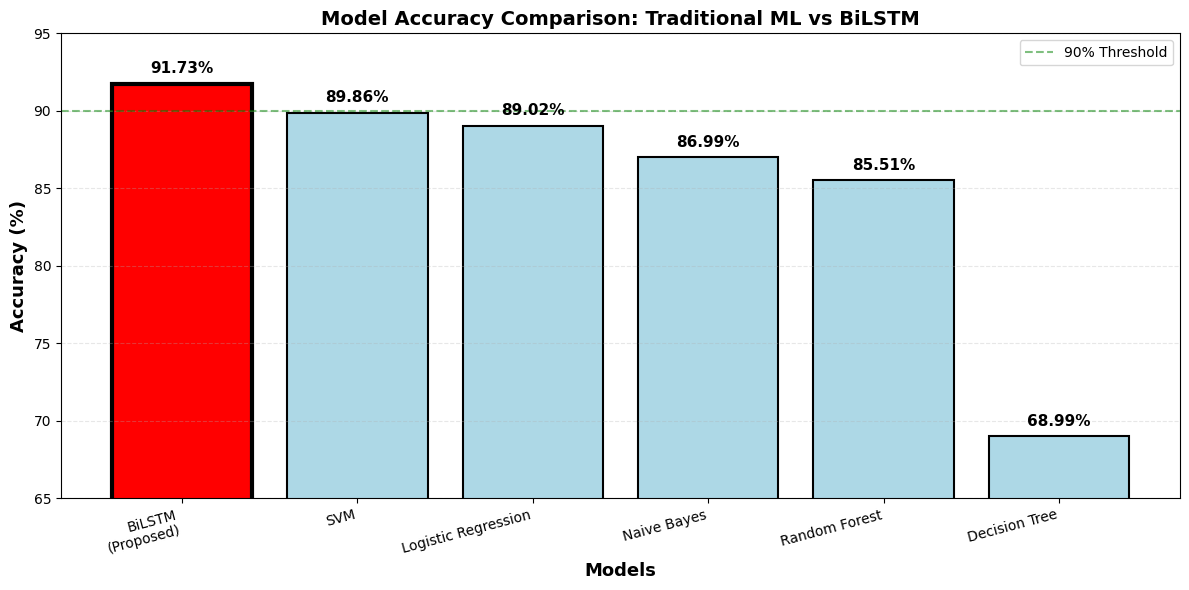

✓ Comparison chart saved as 'baseline_vs_bilstm_comparison.png'


In [ ]:
# ============================================================================
# COMPREHENSIVE COMPARISON: BASELINE MODELS vs BiLSTM
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("="*70)
print("BASELINE MODELS vs BiLSTM COMPARISON")
print("="*70)

# ============================================================================
# 1. COLLECT ALL MODEL RESULTS
# ============================================================================

# Baseline model accuracies (from your traditional ML training)
baseline_results = {
    'SVM': 89.86,
    'Logistic Regression': 89.02,
    'Naive Bayes': 86.99,
    'Random Forest': 85.51,
    'Decision Tree': 68.99
}

# BiLSTM results (from your deep learning training)
bilstm_accuracy = 91.73  # Your final BiLSTM accuracy
bilstm_precision = 92.07
bilstm_recall = 91.35
bilstm_f1 = 91.71

print("\nModel Accuracies:")
print("-" * 50)
for model, acc in baseline_results.items():
    print(f"{model:25s}: {acc:.2f}%")
print(f"{'BiLSTM (Proposed)':25s}: {bilstm_accuracy:.2f}% ✓")

# ============================================================================
# 2. ACCURACY COMPARISON BAR CHART
# ============================================================================

print("\nGenerating comparison visualizations...")

# Prepare data
models = list(baseline_results.keys()) + ['BiLSTM\n(Proposed)']
accuracies = list(baseline_results.values()) + [bilstm_accuracy]

# Sort by accuracy
sorted_indices = np.argsort(accuracies)[::-1]
models = [models[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]

# Colors: highlight BiLSTM in red, others in light blue
colors = ['red' if 'BiLSTM' in model else 'lightblue' for model in models]

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(models, accuracies, color=colors, edgecolor='black', linewidth=1.5)

# Make BiLSTM bar thicker
for i, model in enumerate(models):
    if 'BiLSTM' in model:
        bars[i].set_linewidth(3)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{acc:.2f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Labels and formatting
ax.set_xlabel('Models', fontsize=13, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Model Accuracy Comparison: Traditional ML vs BiLSTM',
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(65, 95)  # Show all models including Decision Tree

# Add 90% threshold line
ax.axhline(y=90, color='green', linestyle='--', alpha=0.5,
           label='90% Threshold')
ax.legend()

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig('baseline_vs_bilstm_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comparison chart saved as 'baseline_vs_bilstm_comparison.png'")

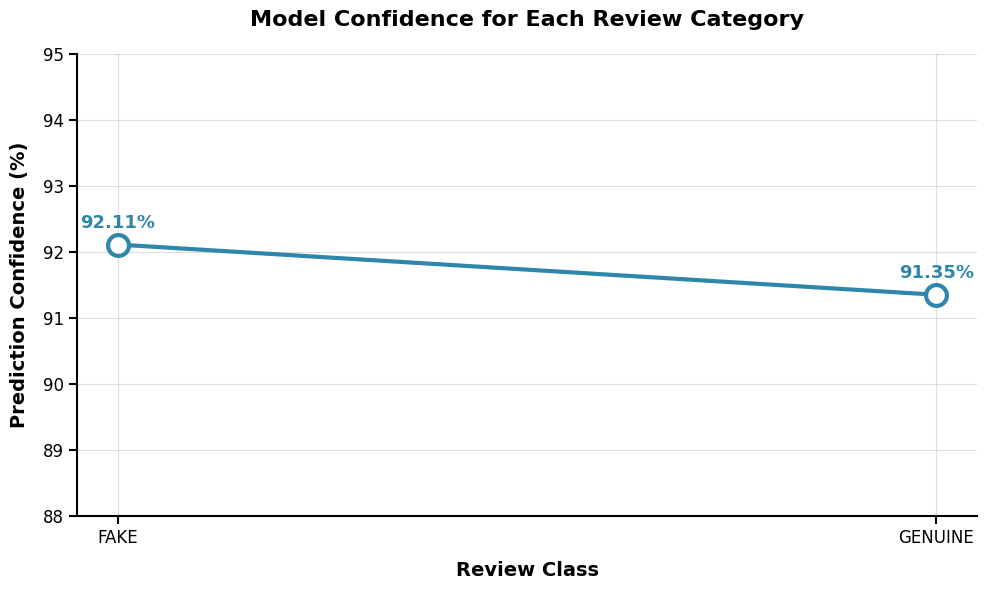

✓ Graph created successfully!

FAKE (CG) Confidence:     92.11%
GENUINE (OR) Confidence:  91.35%
Difference:               0.76%


In [ ]:
# ============================================
# VERIFIED CORRECT - BASED ON YOUR ENCODING
# ============================================

import matplotlib.pyplot as plt
import numpy as np

# From your actual test results
# Label encoding: CG (FAKE) → 0, OR (GENUINE) → 1
# Confusion Matrix: TN=1,857, FP=159, FN=175, TP=1,847

# Recall rates (detection accuracy per class)
fake_recall = 92.11      # TN / (TN + FP) - FAKE detection rate
genuine_recall = 91.35   # TP / (TP + FN) - GENUINE detection rate

# OR use precision if you prefer
fake_precision = 91.39   # TN / (TN + FN)
genuine_precision = 92.07  # TP / (TP + FP)

# Use RECALL for "confidence" as it represents correct detection rate
categories = ['FAKE', 'GENUINE']
confidences = [fake_recall, genuine_recall]

# Create graph
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(categories, confidences,
        marker='o',
        markersize=15,
        linewidth=3,
        color='#2E86AB',
        markerfacecolor='white',
        markeredgewidth=3,
        markeredgecolor='#2E86AB',
        zorder=3)

for i, (cat, conf) in enumerate(zip(categories, confidences)):
    ax.annotate(f'{conf:.2f}%',
                xy=(i, conf),
                xytext=(0, 12),
                textcoords='offset points',
                ha='center',
                fontsize=13,
                fontweight='bold',
                color='#2E86AB')

ax.set_xlabel('Review Class', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Prediction Confidence (%)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Model Confidence for Each Review Category',
             fontsize=16, fontweight='bold', pad=20)

ax.set_ylim(88, 95)
ax.grid(True, alpha=0.25, linestyle='-', linewidth=0.8, color='gray', zorder=1)
ax.set_axisbelow(True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=6)

plt.tight_layout()
plt.savefig('model_confidence_per_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Graph created successfully!")
print(f"\nFAKE (CG) Confidence:     {fake_recall:.2f}%")
print(f"GENUINE (OR) Confidence:  {genuine_recall:.2f}%")
print(f"Difference:               {abs(fake_recall - genuine_recall):.2f}%")
